<a href="https://colab.research.google.com/github/hatimkh20/mnist_handwritten/blob/main/MNIST_Handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning Assignment 01**

Submitted by:
Hatim Khuzema (CS182003) 

# MNIST Handwritten Digit Classification 

MNIST handwritten digit classification build up of 70,000 grayscale images(60k for training, 10k for testing).

Single digit classification from 0 to 9

### Importing Libraries

In [17]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


### Loading Dataset from Keras

Dataset contains 60,000 images for training and 10,000 images for testing.

Size of each image is 28*28 pixel

In [18]:
mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Load data

In [19]:
train_images.shape

(60000, 28, 28)

In [20]:
test_images.shape

(10000, 28, 28)

In [21]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

###Plotting

Verifying the class labels by visually plotting them.

In [22]:
train_labels[:4]

array([5, 0, 4, 1], dtype=uint8)

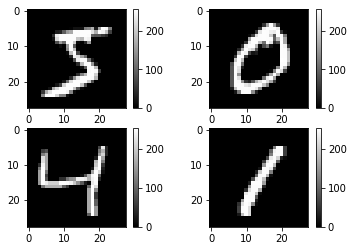

In [23]:
fig = plt.figure()
rows = 2
columns = 2
for i in range(4):
  fig.add_subplot(rows, columns, i + 1)
  plt.imshow(train_images[i], cmap='gray')
  plt.colorbar()
plt.show()

### Data Pre-Processing

Grayscale image are in the range of 0-255 pixels. We will scale them between 0-1. 

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

###Build the Model

Using Sequantial Feed Forward Neural Network by Keras. 

We will have 3 layers.


**First layer** will have input of 784 neurons as image size is 28*28 (784 pixels) so one neuron for one pixel.


**Second layer** is hidden layer having activation function of relu. It has 128 neurons.


**Third layer** is output layer which will contain 10 neurons as we are classifying digits in the range of 0-9.

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the Model

In [27]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2617 - accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1153 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0788 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0581 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0447 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0277 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0194 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.014

### Evaluate the Model

In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.9778
Test accuracy: 0.9778000116348267


### Predicting the Model

In [29]:
predictions = model.predict(test_images)

In [30]:
predictions[0]

array([2.6046887e-09, 4.3066006e-10, 7.6371755e-08, 1.7614228e-05,
       4.3817150e-15, 3.4943080e-11, 7.4859476e-15, 9.9998128e-01,
       7.5839699e-09, 8.8979948e-07], dtype=float32)

### Verifying the Predictions

In [32]:
np.argmax(predictions[0])

7

In [34]:
test_labels[0]

7

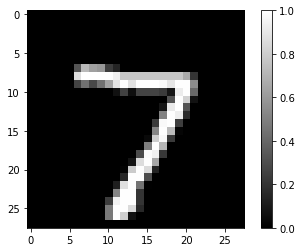

In [38]:
plt.figure()
plt.imshow(test_images[0], cmap='gray')
plt.colorbar()
plt.show()